In [1]:
0import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity
import time

dfOrigin = pd.read_csv(r"C:\Users\Tim Huang\Downloads\fileName")

In [68]:
def is_outlier(points, thresh=1.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
#     median = np.median(points, axis=0)
#     diff = np.sum((points - median)**2, axis=-1)
#     diff = np.sqrt(diff)
#     print(diff)
#     med_abs_deviation = np.median(diff)
    quartile1 = np.quantile(points, .25, axis = 0)
    quartile3 = np.quantile(points, .75, axis = 0)
    iqr = quartile3 - quartile1
    
    quartileScore1 = np.abs(points-quartile1).T[0]
    quartileScore3 = abs(points-quartile3).T[0]
    scores = np.minimum(quartileScore1, quartileScore3)
    print(scores)
#     print(quartileScore1.shape)
#     print((scores> thresh).shape)
    print(thresh*iqr)
    return scores > thresh*iqr

#     modified_z_score = 0.6745 * diff / med_abs_deviation
#     print((modified_z_score > thresh).shape)
#     return modified_z_score > thresh

def getPercent(val, nums, bucket, total):
    print(val, total, np.sum(nums))
    print(nums[-1], bucket.shape, bucket[-1])
    pointsCounted = np.sum(nums)
    count = -1
    for upper in bucket:
        if upper <= val:
            count += 1
            
    
    if count == -1 or count == len(nums):
        return (total-pointsCounted)/total
    else:
        return nums[count]/total
    


##### bandwidth selection from https://www.hindawi.com/journals/jps/2015/242683/ #####

In [ ]:
def bandwithSelection(data):
    length = data.shape[0]
    std = np.std(data)0
    
    return 1.5157*std*length**(-2/5)
    

In [3]:
dfOrigin['2. high'] = dfOrigin['2. high']/dfOrigin['1. open']
dfOrigin['3. low'] = dfOrigin['3. low']/dfOrigin['1. open']
dfOrigin['4. close'] = dfOrigin['4. close']/dfOrigin['1. open']
dfOrigin['5. adjusted close'] = dfOrigin['5. adjusted close']/dfOrigin['1. open']
dfOrigin['1. open'] = 1

In [4]:
saveCopy = dfOrigin

In [5]:
dfOrigin = dfOrigin.assign(nextDay1=dfOrigin['4. close'].shift(-1))
dfOrigin = dfOrigin.assign(nextDay2=dfOrigin['4. close'].shift(-2))
dfOrigin = dfOrigin.assign(nextDay3=dfOrigin['4. close'].shift(-3))
dfOrigin = dfOrigin.assign(nextDay4=dfOrigin['4. close'].shift(-4))
dfOrigin = dfOrigin.assign(nextDay5=dfOrigin['4. close'].shift(-5))
print(dfOrigin.head())

         date  1. open   2. high    3. low  4. close  5. adjusted close  \
0  2000-01-03        1  1.001753  0.982945  0.987451           0.987451   
1  2000-01-04        1  1.000027  0.967991  0.969002           0.969002   
2  2000-01-05        1  1.020541  0.995386  1.012128           1.012128   
3  2000-01-06        1  1.018004  0.998657  1.012588           1.012588   
4  2000-01-07        1  1.024991  0.999365  1.024495           1.024495   

     6. volume  7. dividend amount  8. split coefficient company  nextDay1  \
0  169750000.0                 0.0                   1.0    DJIA  0.969002   
1  178420000.0                 0.0                   1.0    DJIA  1.012128   
2  203190000.0                 0.0                   1.0    DJIA  1.012588   
3  176550000.0                 0.0                   1.0    DJIA  1.024495   
4  184900000.0                 0.0                   1.0    DJIA  1.003444   

   nextDay2  nextDay3  nextDay4  nextDay5  
0  1.012128  1.012588  1.024495  1.0

In [6]:
dfOrigin['5 day result'] = dfOrigin['nextDay1'] * dfOrigin['nextDay2'] *dfOrigin['nextDay3'] * \
                            dfOrigin['nextDay4'] * dfOrigin['nextDay5']

In [7]:
dfOrigin['5 day binary'] = dfOrigin['5 day result'] >= 1

In [8]:
dfOrigin = dfOrigin.assign(finalComp=dfOrigin['company'].shift(-5))
print(dfOrigin.head())

         date  1. open   2. high    3. low  4. close  5. adjusted close  \
0  2000-01-03        1  1.001753  0.982945  0.987451           0.987451   
1  2000-01-04        1  1.000027  0.967991  0.969002           0.969002   
2  2000-01-05        1  1.020541  0.995386  1.012128           1.012128   
3  2000-01-06        1  1.018004  0.998657  1.012588           1.012588   
4  2000-01-07        1  1.024991  0.999365  1.024495           1.024495   

     6. volume  7. dividend amount  8. split coefficient company  nextDay1  \
0  169750000.0                 0.0                   1.0    DJIA  0.969002   
1  178420000.0                 0.0                   1.0    DJIA  1.012128   
2  203190000.0                 0.0                   1.0    DJIA  1.012588   
3  176550000.0                 0.0                   1.0    DJIA  1.024495   
4  184900000.0                 0.0                   1.0    DJIA  1.003444   

   nextDay2  nextDay3  nextDay4  nextDay5  5 day result  5 day binary  \
0  1.01

In [9]:
dfOrigin = dfOrigin[dfOrigin['finalComp'] == dfOrigin['company']]

In [10]:
x = dfOrigin[['2. high', '3. low', '4. close', '5. adjusted close']]
y = dfOrigin[['5 day binary']]
x = x.to_numpy()
y = y.to_numpy().astype(int)

data = dfOrigin[['5 day result']].to_numpy()



In [11]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

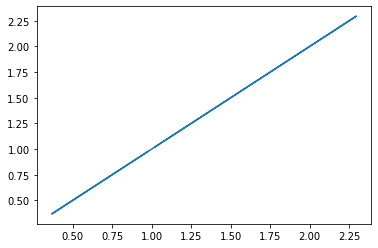

In [12]:
sorted_data = np.sort(data)

yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data,data)

plt.show()

In [13]:
print(xTrain.shape, yTrain.shape)
yTrain = yTrain.T[0]
yTest = yTest.T[0]

(462940, 4) (462940, 1)


In [14]:
#splitting
numTrain = xTrain.shape[0]
numTest = xTest.shape[0]
print(yTrain == 0)
# Split training data into two separate classes
xTrain0 = xTrain[yTrain == 0]
xTrain1 = xTrain[yTrain == 1]

M = xTrain.shape[1]

# Estimate mean of Gaussian f_X|Y(x_ij | y_i)
# muhat[0,j] equals the mean of X_ij given Y_i=0
# muhat[1,j] equals the mean of X_ij given Y_i=1
muhat = np.zeros((2,M))
muhat[0] = np.mean(xTrain0, axis=0)
muhat[1] = np.mean(xTrain1, axis=0)

[False False False ... False  True False]


Test accuracy: 0.472299
Test false alarms: 0
Test missed detections: 61074


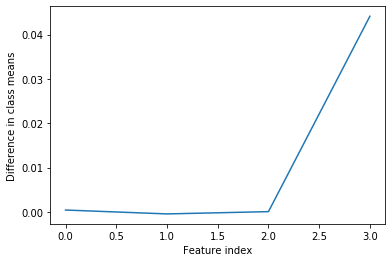

In [15]:
# Naive baseline classifier:  Predict all test examples are class 0
yHat = np.zeros(numTest)

# Accuracy (fraction of test days classified correctly)
accuracy = np.sum(yHat==yTest)/numTest
print('Test accuracy: %f' % accuracy)
falseAlarms = np.sum(np.logical_and(yHat==1, yTest==0))
print('Test false alarms: %d' % falseAlarms)
misses = np.sum(np.logical_and(yHat==0, yTest==1))
print('Test missed detections: %d' % misses)

# show plot
plt.plot(muhat[0] - muhat[1])
plt.xlabel('Feature index')
plt.ylabel('Difference in class means')

plt.show()

This part is adjusting for standard deviations

In [16]:
sigmahat = np.zeros((2,M))
sigmahat[0] = np.std(xTrain0, axis=0)
sigmahat[1] = np.std(xTrain1, axis=0)

In [17]:
logDensityC = np.zeros([2,xTrain.shape[0]])
for i in range(xTest.shape[0]):
    logDensityC[0,i] = sum(np.log(2*np.pi* sigmahat[0])*(-1/2) - np.square(xTest[i]-muhat[0])/(2*sigmahat[0]))
    logDensityC[1,i] = sum(np.log(2*np.pi* sigmahat[1])*(-1/2) - np.square(xTest[i]-muhat[1])/(2*sigmahat[1]))
    
print(logDensityC)

[[1.49725643 2.22843339 2.20598105 ... 0.         0.         0.        ]
 [1.6225633  2.39823492 2.37692756 ... 0.         0.         0.        ]]


In [18]:
yC = np.zeros(xTest.shape[0])
for i in range(xTest.shape[0]):
     yC[i] = 0 if logDensityC[0,i] >= logDensityC[1,i] else 1

In [19]:
accuracy = np.sum(yC==yTest)/numTest
print('Test accuracy: %f' % accuracy)
falseAlarms = np.sum(np.logical_and(yC==1, yTest==0))
print('Test false alarms: %d' % falseAlarms)
misses = np.sum(np.logical_and(yC==0, yTest==1))
print('Test missed detections: %d' % misses)

Test accuracy: 0.529317
Test false alarms: 53929
Test missed detections: 546


In [20]:
print('Predicted going up:', sum(yC))
print('False Positives:', falseAlarms)
print('Correct Percentage:', 1 - falseAlarms/sum(yC))

Predicted going up: 114457.0
False Positives: 53929
Correct Percentage: 0.5288274199044183


    The following is no consideration of standard deviation

In [21]:
logDensity = np.zeros([2,xTest.shape[0]])

for i in range(xTest.shape[0]):
    logDensity[0,i] = sum(np.square(xTest[i]-muhat[0]))
    logDensity[1,i] = sum(np.square(xTest[i]-muhat[1]))

In [22]:
yGuess = np.zeros(xTest.shape[0])
for i in range(xTest.shape[0]):
     y[i] = 1 if logDensity[0,i] > logDensity[1,i] else 0

In [23]:
accuracy = np.sum(yGuess==yTest)/numTest
print('Test accuracy: %f' % accuracy)
falseAlarms = np.sum(np.logical_and(yGuess==1, yTest==0))
print('Test false alarms: %d' % falseAlarms)
misses = np.sum(np.logical_and(yGuess==0, yTest==1))
print('Test missed detections: %d' % misses)

Test accuracy: 0.472299
Test false alarms: 0
Test missed detections: 61074


    Following is considering with standard deviation

In [24]:
logDensityD = np.zeros([2,xTest.shape[0]])
pY1 = xTrain1.shape[0]/xTrain.shape[0]
pY0 = xTrain0.shape[0]/xTrain.shape[0]

for i in range(xTest.shape[0]):
    logDensityD[0,i] = np.log(pY0) + sum(np.log(2*np.pi* sigmahat[0])*(-1/2) - np.square(xTest[i]-muhat[0])/(2*sigmahat[0]))
    logDensityD[1,i] = np.log(pY1) + sum(np.log(2*np.pi* sigmahat[1])*(-1/2) - np.square(xTest[i]-muhat[1])/(2*sigmahat[1]))

In [25]:
yD = np.zeros(xTest.shape[0])
for i in range(xTest.shape[0]):
     yD[i] = 0 if logDensityD[0,i] > logDensityD[1,i] else 1

In [26]:
accuracy = np.sum(yD==yTest)/numTest
print('Test accuracy: %f' % accuracy)
falseAlarms = np.sum(np.logical_and(yD==1, yTest==0))
print('Test false alarms: %d' % falseAlarms)
misses = np.sum(np.logical_and(yD==0, yTest==1))
print('Test missed detections: %d' % misses)

Test accuracy: 0.529360
Test false alarms: 53936
Test missed detections: 534


In [27]:
print('Predicted going up:', sum(yD))
print('False Positives:', falseAlarms)
print('Correct Percentage:', 1 - falseAlarms/sum(yD))

Predicted going up: 114476.0
False Positives: 53936
Correct Percentage: 0.5288444739508718


        Scikit learn's things

In [28]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(xTrain, yTrain).predict_proba(xTest)
y_noAdjust = np.zeros(xTest.shape[0])
y_adjust = np.zeros(xTest.shape[0])
for i in range(y_pred.shape[0]):
    y_adjust[i] = 1 if y_pred[i][1] >= .6 else 0
    y_noAdjust[i] = 1 if y_pred[i][1] > y_pred[i][0] else 0

In [29]:
#################### Test for if double probability ####################

In [30]:
accuracy = np.sum(y_adjust==yTest)/numTest
print('Test accuracy: %f' % accuracy)
falseAlarms = np.sum(np.logical_and(y_adjust==1, yTest==0))
print('Test false alarms: %d' % falseAlarms)
misses = np.sum(np.logical_and(y_adjust==0, yTest==1))
print('Test missed detections: %d' % misses)

Test accuracy: 0.514360
Test false alarms: 32661
Test missed detections: 23545


In [31]:
print('Predicted going up:', sum(y_adjust))
print('False Positives:', falseAlarms)
print('Correct Percentage:', 1 - falseAlarms/sum(y_adjust))

Predicted going up: 70190.0
False Positives: 32661
Correct Percentage: 0.5346773044593247


In [32]:
#################### Test for just greater possibility ################

In [33]:
accuracy = np.sum(y_noAdjust==yTest)/numTest
print('Test accuracy: %f' % accuracy)
falseAlarms = np.sum(np.logical_and(y_noAdjust==1, yTest==0))
misses = np.sum(np.logical_and(y_noAdjust==0, yTest==1))
print('Test missed detections: %d' % misses)
print()
print('Predicted going up:', sum(y_noAdjust))
print('False Positives:', falseAlarms)
print('Correct Percentage:', 1 - falseAlarms/sum(y_noAdjust))


Test accuracy: 0.527632
Test missed detections: 4148

Predicted going up: 107448.0
False Positives: 50522
Correct Percentage: 0.5298004616186434


        Gausian test

In [34]:
from scipy import stats
x = xTest[:, 2]

k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


    Finding type of distribution

[0.0047321  0.007277   0.00497277 ... 0.00059136 0.0055398  0.00457256]
[0.01950697]
[0.00334363 0.00344705 0.0017358  ... 0.00477864 0.00016156 0.0060375 ]
[0.01887744]


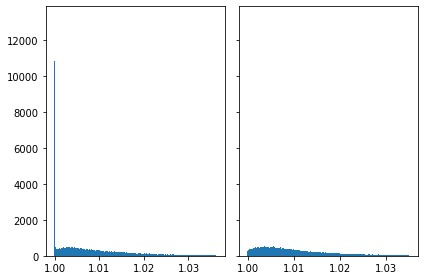

In [35]:
x = xTrain0[:,0]
y = xTrain1[:,0]  ###### High Comparision ######
x = x[~is_outlier(x)]
y = y[~is_outlier(y)]

n_bins = 1000
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
n0_0, bins0_0, patches0_0 = axs[0].hist(x, bins= n_bins)
n0_1, bins0_1, patches0_1 = axs[1].hist(y, bins= n_bins)

plt.show()

[0.0005302  0.00535419 0.00494589 ... 0.00053123 0.00278954 0.00202999]
[0.01986368]
[0.00283295 0.00563279 0.00153674 ... 0.00526434 0.00165241 0.00155631]
[0.0193995]


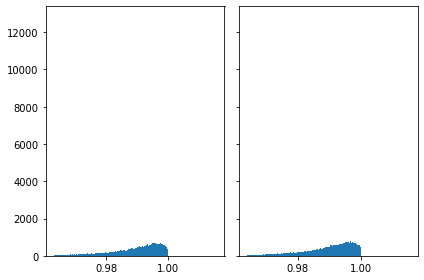

In [36]:
x = xTrain0[:,1]
y = xTrain1[:,1]   ######### Low Comparision  #########
x = x[~is_outlier(x)]
y = y[~is_outlier(y)]

n_bins = 1000
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
n1_0, bins1_0, patches1_0 = axs[0].hist(x, bins=n_bins)
n1_1, bins1_1, patches1_1 = axs[1].hist(y, bins=n_bins)
plt.show()

[0.00527832 0.01019057 0.00981809 ... 0.00840178 0.00107339 0.00087608]
[0.0261479]
[0.00350545 0.00136429 0.00337738 ... 0.00102261 0.00591447 0.00751886]
[0.02542209]


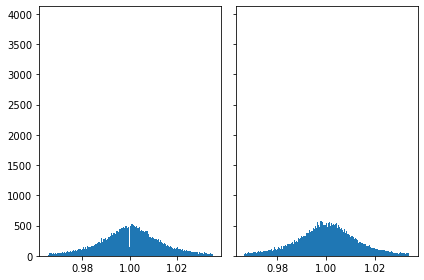

In [37]:
x = xTrain0[:,2]
y = xTrain1[:,2]  ########## Close Comparison ##########
x = x[~is_outlier(x)]
y = y[~is_outlier(y)]
# print(x.shape, xTrain.shape)

n_bins = 1000
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
n2_0, bins2_0, patches2_0 = axs[0].hist(x, bins=n_bins)
n2_1, bins2_1, patches2_1 = axs[1].hist(y, bins=n_bins)

plt.show()

[0.03526501 0.04259329 0.01864192 ... 0.1251769  0.02471968 0.03351479]
[0.59992233]
[0.16705369 0.02205956 0.03320305 ... 0.00474468 0.28466151 0.03094271]
[0.61394442]


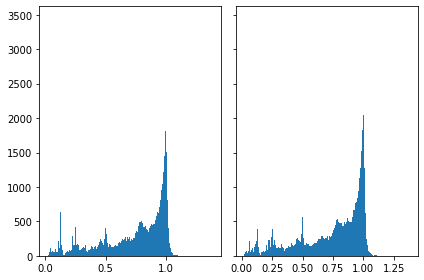

In [38]:
x = xTrain0[:,3]
y = xTrain1[:,3]  ########## adjst close #############
x = x[~is_outlier(x)]
y = y[~is_outlier(y)]

n_bins = 1000
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
n3_0, bins3_0, patches3_0 = axs[0].hist(x, bins=n_bins)
n3_1, bins3_1, patches3_1 = axs[1].hist(y, bins=n_bins)

plt.show()

    Don't use the gaussian but use the buckets instead

####    Following Class Taken from https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html ####

    Using Kernal Density Estimation to find the distributions
    f_hat(x) = 1/nh * sum( K[(x - x_i)/h])
    with K(x) = normal distribution function

In [52]:
from sklearn.base import BaseEstimator, ClassifierMixin


class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        self.predicted = 0
        
    def fit(self, X, y):
        print('fitting', X, y)
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        print('starting modelFitting')
        self.models_ = []
        for Xi in training_sets:
#             print('modeling', Xi, Xi.shape)
            self.models_.append(KernelDensity(bandwidth=bandwithSelection(Xi),
                                      kernel=self.kernel).fit(Xi))
            print('finished')
        print('getting log priors')
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        start = time.time()
        self.predicted += 1
        print('predicted')
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        print('doing smth')
        print(logprobs)
        result = np.exp(logprobs + self.logpriors_)
        
        end = time.time()
        print('time taken', end - start)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        print('predicting')
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [70]:
custom = KDEClassifier()
y_pred = custom.fit(xTrain, yTrain)


fitting [[1.00703267 0.98616152 1.00521779 0.80129764]
 [1.00713609 0.98896136 0.99041088 0.99041088]
 [1.00195324 0.99472484 0.99515255 0.93514827]
 ...
 [1.0038506  0.99460916 0.99768964 0.27439353]
 [1.01218002 0.99814203 1.00990917 1.00200454]
 [1.0102365  0.99470526 0.99929403 0.99929403]] [1 1 1 ... 1 0 1]
starting modelFitting
finished
finished
getting log priors


In [75]:
y_pred = y_pred.predict(xTest)

predicting
predicted
doing smth
[[-12.41584984 -19.03186742]
 [ 10.90849754  11.30079445]
 [  7.69163436   7.56324775]
 ...
 [  9.60709151   9.83825773]
 [ 12.03032001  12.17536182]
 [  5.89827703   5.68666793]]
time taken 4791.3602459430695


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [78]:
accuracy = np.sum(y_pred==yTest)/numTest
print('Test accuracy: %f' % accuracy)
falseAlarms = np.sum(np.logical_and(y_pred==1, yTest==0))
misses = np.sum(np.logical_and(y_pred==0, yTest==1))
print('Test missed detections: %d' % misses)
print()
print('Predicted going up:', sum(y_noAdjust))
print('False Positives:', falseAlarms)
print('Correct Percentage:', 1 - falseAlarms/sum(y_noAdjust))

Test accuracy: 0.527364
Test missed detections: 4494

Predicted going up: 107448.0
False Positives: 50207
Correct Percentage: 0.5327321122775668


In [74]:
print(xTest.shape)
print(xTest.shape[0]*.04 / 60)

(115736, 4)
77.15733333333334
